<a href="https://colab.research.google.com/github/manujsinghwal/23andMe-data-analysis/blob/main/23andMe_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 23andMe Data Analysis

In [ ]:
# Mounting Google drive as dataset stored in a drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Data Exploration
Before diving into the questions, let's apply some data exploration techniques to have a better understanding of what we are dealing with in the dataset. We'll start with importing a few useful libraries. We will use pandas to create and analyse the dataset, and matplotlib.pyplot to do plot graphs to visualize our answers. Glob will be used just to get all filenames under the /data directory.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy import stats

Let's create our dataset. First, we need to get all filenames under the **23andMe** directory in a list so we can concatenate them in one dataset using the pandas concat function which can accept a list as input. This method prevents us to use a for loop to iterate over files, read them separately and append to a dataset.

In [ ]:
# Getting all filenames under the data directory
l = [pd.read_csv(filename) for filename in glob.glob("gdrive/My Drive/Colab Notebooks/Dataset/23andMe/*.csv")]

# Checking the list size to understand how many we read using above statement
len(l)

50

We have 50 files in our dataset, hence it's matching with the number of total files over there. Now, let's concatnate the data from these files and get everthing in a single dataframe.

In [ ]:
# Creating the dataset using all files under the data directory
df = pd.concat(l, axis = 0)
df.head()

,sale_time,purchaser_gender
0,2012-11-05 01:03:52,female
1,2012-11-05 01:17:49,female
2,2012-11-05 01:37:42,female
3,2012-11-05 01:43:03,female
4,2012-11-05 01:54:20,female


In [ ]:
df.columns

Index(['sale_time', 'purchaser_gender'], dtype='object')

In [ ]:
df.shape

(204329, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204329 entries, 0 to 3408
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [ ]:
# Assigning a constant figure size and use it in plotting to make plots larger
fig_size = (8,6)

### Question 1
**Plot daily sales for all 50 weeks.**

In [ ]:
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.date

# Grouping data by date
sales = (
    df
    .groupby('sale_day')['purchaser_gender']
    .count()
    .reset_index(name='n_sales')
)

sales.head()

,sale_day,n_sales
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476


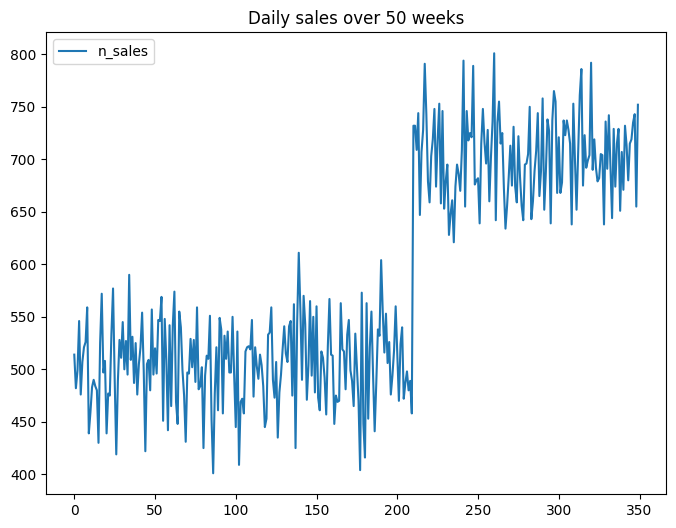

In [ ]:
#  Plotting daily sales for all 50 weeks
sales.plot(figsize=fig_size, title = 'Daily sales over 50 weeks')
plt.show()

### Question 2
**It looks like there has been a sudden change in daily sales. What date did it occur?**
\
To find out the sudden change in daily sales data, we can calculate the absolute sales difference from previous day and find then out the maximum difference.

In [ ]:
# Calculating the absolute difference between today's and previous day sale
sales['difference'] = abs(sales['n_sales'].diff())

# Finding out the biggest difference
sudden_change = (
    sales
    .query('difference == difference.max()')
    .reset_index(drop=True)
    )

sudden_change

,sale_day,n_sales,difference
0,2013-04-29,732,274.0


### Question 3
**Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?**